# C3: ASSUMPTIONS OF LINEAR REGRESSION & MODEL EVALUATION

## Assumptions of Linear Regression

For a linear regression model to be valid and reliable, the following **five key assumptions** must hold:

1. **Linearity**  
2. **Independence of Errors**  
3. **Homoscedasticity**  
4. **Normality of Errors**  
5. **No Multicollinearity**

### 1. Linearity
- The relationship between the independent variables (X) and the dependent variable (y) must be **linear**.  
- If this relationship is **non-linear**, the regression line will not capture the true trend, leading to **biased predictions**.  
- **Check:** Plot the dependent variable against each predictor to verify if the relationship looks linear.

### 2. Independence of Errors
- The residuals (errors) should be **independent of each other**.  
- If residuals are correlated, it suggests that some important explanatory variables are missing or that time-dependence exists (common in time-series data).  
- **Check:** Use the **Durbin-Watson test** (value close to 2 indicates independence).

### 3. Homoscedasticity
- The variance of residuals should be **constant** across all levels of X.  
- If the variance **increases or decreases systematically** with X, this is called **heteroscedasticity**, which makes predictions unreliable and inflates Type I errors in hypothesis testing.  
- **Check:** Plot residuals vs fitted values. The spread should look constant (no funnel shape).

### 4. Normality of Errors
- Residuals should approximately follow a **normal distribution**.  
- This is not necessary for making predictions, but it is important for **valid hypothesis testing and confidence intervals**.  
- **Check:** Use a **histogram or Q–Q plot** of residuals. Formal tests include the **Shapiro–Wilk test**.

### 5. No Multicollinearity
- Predictor variables should not be **highly correlated** with each other.  
- If predictors are strongly correlated, it becomes difficult to separate their individual effects, and model coefficients become unstable.  
- **Check:** Calculate the **Variance Inflation Factor (VIF)**.  
  - Rule of thumb: VIF < 5 (preferably < 3).

### Tests for Assumptions

| **Assumption**         | **How to Check**                                                 |
| ---------------------- | ---------------------------------------------------------------- |
| Linearity              | Scatter plot of residuals vs fitted values → should look random. |
| Independence of errors | Durbin-Watson test (value near 2 is good).                       |
| Homoscedasticity       | Plot residuals vs fitted values → spread should be constant.     |
| Normality of errors    | Histogram/Q-Q plot of residuals; Shapiro-Wilk test.              |
| No multicollinearity   | Variance Inflation Factor (VIF) < 5 (preferably < 3).            |

## Model Evaluation Metrics

To evaluate how well a regression model predicts actual values, we use the following metrics:

1. **Mean Absolute Error (MAE)**  
2. **Mean Squared Error (MSE)**  
3. **Root Mean Squared Error (RMSE)**  
4. **$R^2$ (Coefficient of Determination)**  

### 1. Mean Absolute Error (MAE)
- Measures the **average magnitude of errors** in predictions.  
- Less sensitive to outliers than MSE.  
- Formula:  
  $\mathrm{MAE} = \frac{\sum|y_i - \hat{y_i}|}{n}$  

### 2. Mean Squared Error (MSE)
- Measures the **average squared difference** between predicted and actual values.  
- Squaring penalizes larger errors more strongly.  
- Formula:  
  $\mathrm{MSE} = \frac{\sum(y_i - \hat{y_i})^2}{n}$  

### 3. Root Mean Squared Error (RMSE)
- Square root of MSE, making it comparable to the original units of the target variable.  
- More interpretable than MSE but still sensitive to outliers.  
- Formula:  
  $\mathrm{RMSE} = \sqrt{\frac{\sum(y_i - \hat{y_i})^2}{n}}$  

### 4. $R^2$ (Coefficient of Determination)
- Represents the proportion of variance in the dependent variable explained by the independent variables.  
- Ranges from **0 to 1**:  
  - 0 → Model explains none of the variance.  
  - 1 → Model explains all the variance (perfect fit).  
- **Adjusted $R^2$** is often used when multiple predictors are involved, as it penalizes adding irrelevant variables.

## Categorical Variables in Regression

- Regression models require **numerical inputs**, so categorical variables (e.g., “Red”, “Blue”, “Green”) must be encoded.  
- **Encoding methods:**  
  - **One-Hot Encoding:** Creates new binary columns for each category.  
  - **Dummy Variables:** Similar to one-hot, but one category is dropped to avoid **dummy variable trap** (perfect multicollinearity).  

**Example:**  
If "Color" has categories {Red, Blue, Green}:  
- One-hot encoding → 3 columns: `Red`, `Blue`, `Green` (1 if present, else 0).  
- Dummy encoding → drop one column (say `Red`) → only `Blue` and `Green` remain. Red is inferred when both are 0.  

## Interaction Effects

- Sometimes, the **combined effect** of two variables on the outcome is different from their individual effects.  
- Example: The effect of **exercise** on weight loss may depend on **diet quality**.  
- To model this, we create an **interaction term**:  

  `New Feature = Exercise × Diet`  

- This allows regression to capture relationships like:  
  - High exercise + high diet quality → stronger effect than expected from each alone.  


Coefficients: [2.06773335 1.57098921]
Intercept: 2.54454452820341


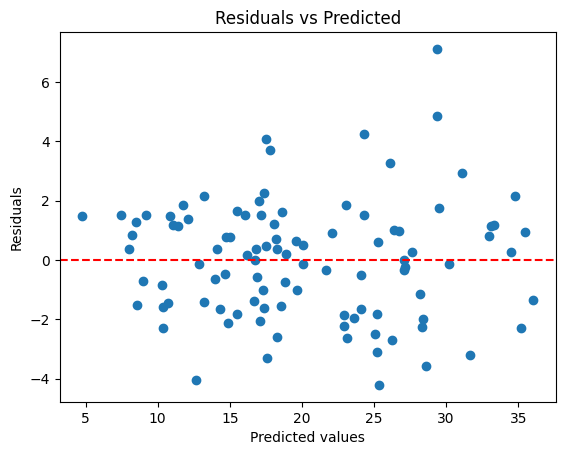

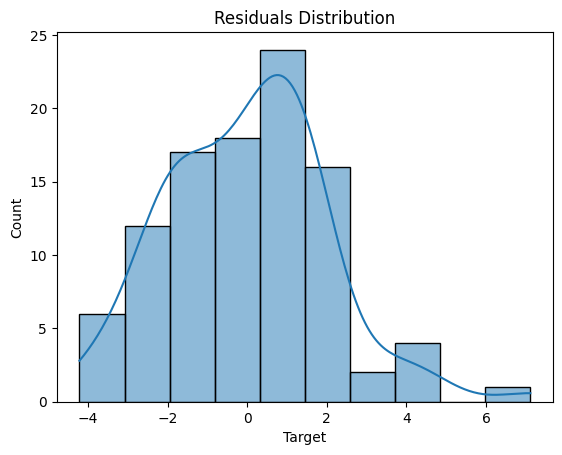

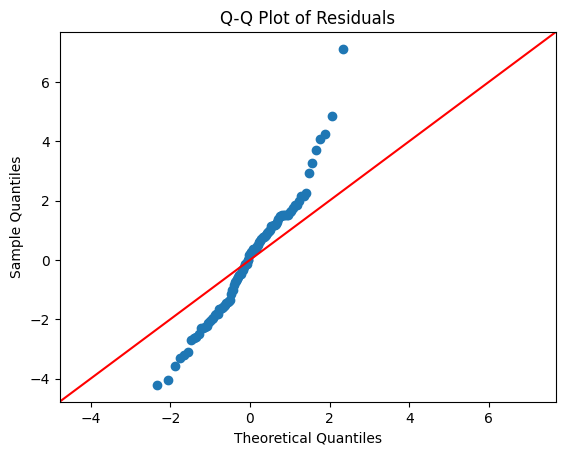

    Feature       VIF
0     const  6.658341
1  Feature1  1.001430
2  Feature2  1.001430
MAE: 1.58
MSE: 3.93
RMSE: 1.98
R²: 0.94


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# ---------------------------
# 1. Create sample dataset
# ---------------------------
np.random.seed(42)
X = np.random.rand(100, 2) * 10   # two features
y = 3 + 2*X[:,0] + 1.5*X[:,1] + np.random.randn(100) * 2  # linear with noise

df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Target"] = y

# ---------------------------
# 2. Fit Linear Regression
# ---------------------------
X_train = df[["Feature1", "Feature2"]]
y_train = df["Target"]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# ---------------------------
# 3. Residuals (errors)
# ---------------------------
residuals = y_train - y_pred

# Linearity & Homoscedasticity check
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Normality check
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# ---------------------------
# 4. Multicollinearity check (VIF)
# ---------------------------
X_const = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i)
              for i in range(X_const.shape[1])]
print(vif)

# ---------------------------
# 5. Model Evaluation Metrics
# ---------------------------
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
